<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/METROPOLIS_HASTINGS_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## METODO DE METROPOLIS


Vamos a simular una distribución normal, por medio de método de metropolis:
$$
f(x,\mu,\sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^-{\frac{(x-\mu)^2}{{2 \sigma^2}}}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x,mu, std):
  return (1/np.sqrt(2*np.pi*std**2))*np.exp(-(x-mu)**2/(2*std**2))

In [ ]:
sigma = 0.2
std= 0.1

In [ ]:
delta = 0.5

In [ ]:
n = 50000 #Número de iteraciones, se vuelve estable el proceso cuando n es muy grnade
x = np.zeros(n) #Inicializamos el vector en ceros
x[0] = 0
acept = 0
for i in range(0,n-1):
  y = x[i]+ np.random.uniform(-delta,delta) #genera un numero aleatorio entre el intervalo delta.
  if np.random.rand() < min(1,f(y,mu,sigma)/f(x[i],mu,sigma)):
    x[i+1] = y
    acept += 1
  else:
    x[i+1] = x[i]
print("La aceptación fue del: ",acept/n*100,"%")

La aceptación fue del:  55.69 %


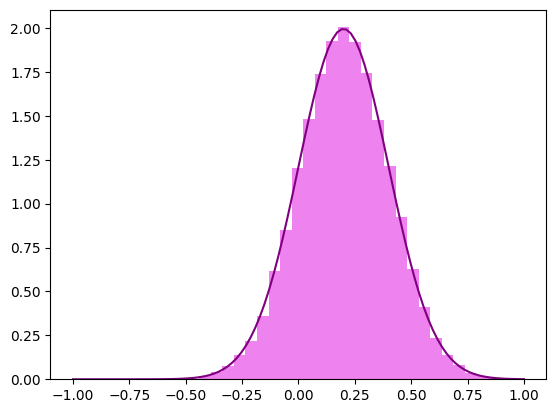

In [ ]:
plt.hist(x,density = True, bins = 30,  color= '#EE82EE')
xs = np.linspace(-1,1,100) #Nos indica hacia donde se
plt.plot(xs,f(xs,mu,sigma), color = '#800080')
plt.show()

No generan una caminatas aleatorias. Uno de los casos de esta caminata, es el movimiento browniano.

In [ ]:
np.mean(x)

0.20287227106798433

Graficamos x

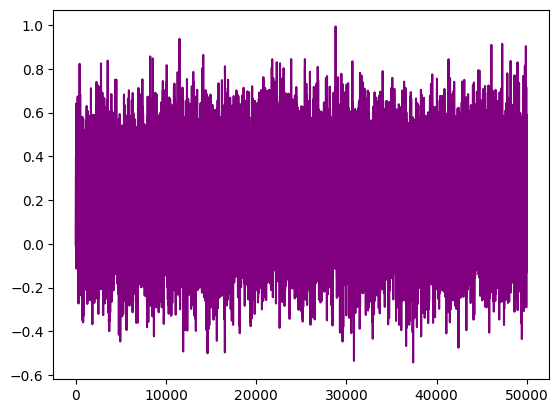

In [ ]:
plt.plot(x, color = '#800080')
plt.show()

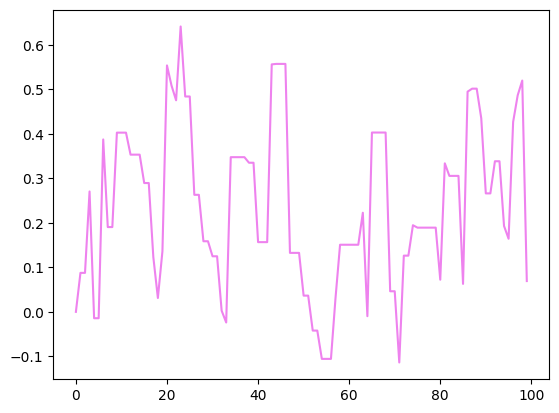

In [ ]:
plt.plot(x[0:100], color = '#EE82EE')

## DISTRIBUCIÓN DE CAUCHY

Buscar la distribución de **Cauchy** y generar la función

La distribución de Cauchy tiene dos partes principales: un parámetro de escala (λ) y un parámetro de ubicación $(x_0)$.

Es conocida como la distribución de Cauchy y en el ámbito de la física se conoce como la distribución de Lorentz, la función Lorentziana o la distribución de Breit-Wigner. Su importancia en la física es dada por ser la solución de la ecuación diferencial que describe la resonancia forzada.
Calcular la media y la desviación estandar de manera analítica suele ser muy rigorozo, por lo que no se encuentran formulas para esto.

In [ ]:
def g(x, x0, gamma):
    return 1 / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

In [ ]:
# Parámetros
x0 = 0
gamma = 1
delta = 1

In [ ]:
n = 5000 #Número de iteraciones, se vuelve estable el proceso cuando n es muy grnade
x = np.zeros(n) #Inicializamos el vector en ceros
x[0] = 0
acept = 0
for i in range(0,n-1):
  y = x[i]+ np.random.uniform(-delta,delta) #genera un numero aleatorio entre el intervalo delta.
  if np.random.rand() < min(1,g(y,x0,gamma)/g(x[i],x0,gamma)):
    x[i+1] = y
    acept += 1
  else:
    x[i+1] = x[i]
print("La aceptación fue del: ",acept/n*100,"%")

La aceptación fue del:  86.32 %


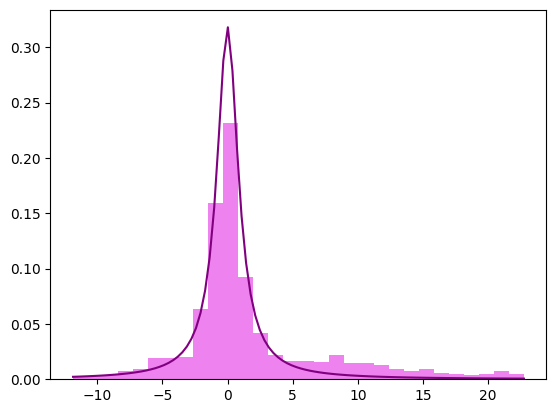

In [ ]:
plt.hist(x,density = True, bins = 30,  color= '#EE82EE')
xs = np.linspace(min(x), max(x),100) #Nos indica hacia donde se
plt.plot(xs,g(xs,x0,gamma), color = '#800080')
plt.show()

In [ ]:
np.mean(x)

4.8202

## DISTRIBUCIÓN DE POISSON

Ahora, implementemos la fución de **Poisson**

La distribución de Poisson es una distribución de probabilidad que define la probabilidad de que ocurra un determinado número de eventos durante un período de tiempo.

Es decir, la distribución de Poisson sirve para modelizar variables aleatorias que describen el número de veces que se repite un fenómeno en un intervalo de tiempo.

La distribución de Poisson tiene un parámetro característico, que se representa con la letra griega **λ e indica el número de veces que se espera que ocurra el evento estudiado durante un intervalo dado.**

la fórmula para calcular una probabilidad de una distribución de Poisson:

$$
p(x,\lambda) = \frac{e^{-\lambda}*\lambda x }{x!}
$$

La **media** de una distribución de Poisson es igual a su parámetro característico λ. Para este cas

$$
E[x] = \lambda = 5
$$

Al igual que su desviación estandar
$$
Var[x] = \lambda = 5
$$
Por lo tanto, la desviación estandar es $\sigma = \sqrt{\lambda} = \sqrt{5} = 2.23  $

Aplicando el métrodo de Metropolis obtenemos lo siguiente:

In [ ]:
!pip install scipy #Instalamos la libreria Spicy para no tener problemas con los datos negativos en el factorial
from scipy.special import factorial

In [ ]:
def h(x, lam): #Definimos la distribución de Poisson¿
  return (np.exp(-lam) * (lam**x)) / factorial(x)

In [ ]:
lam = 5 #Definimos el parametro
delta = 10 #Indicamos el intervalo donde buscamos que se encuentren los datos

In [ ]:
n = 5000 #Número de iteraciones, se vuelve estable el proceso cuando n es muy grnade
x = np.zeros(n, dtype=int)  # Inicializamos el vector en ceros (valores enteros)
x[0] = 0
acept = 0
for i in range(0, n - 1):
  y = int(x[i] + np.random.uniform(-delta, delta))  # Genera un número aleatorio entre el intervalo delta.
  # Asegura que y sea un entero no negativo
  y = max(0, y)

  if np.random.rand() < min(1, h(y, lam) / h(x[i], lam)):
    x[i + 1] = y
    acept += 1
  else:
    x[i + 1] = x[i]
print("La aceptación fue del: ",acept/n*100,"%")

La aceptación fue del:  39.72 %


En el histograma se observa la distribución de los datos, la cual sigue una distribución de poisson. Esto se confirma al graficar la función(linea morada oscuro)

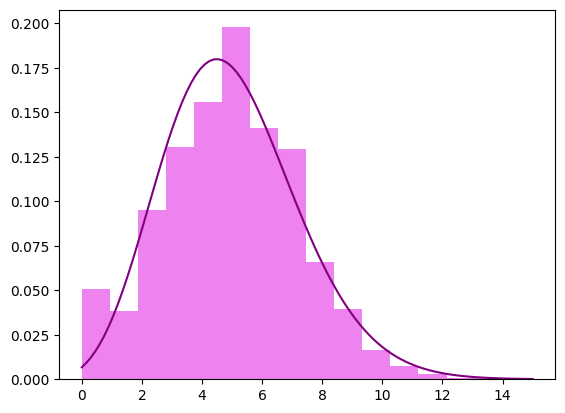

In [20]:
plt.hist(x, density=True, bins=15, color='#EE82EE')
xs = np.linspace(0, max(x)+1,100)
plt.plot(xs,h(xs,lam), color = '#800080') # Now h(x, lam) can handle the array input xs
plt.show()

La media de los datos es la siguiente, la cual, es muy cercana a 5,nuestro valor de $\lambda$.
Para la desviación estandar esta es cercana a 2.23

In [21]:
np.mean(x)

4.8202

In [24]:
np.std(x)

2.4014728730510364

## DISTRIBUCIÓN EXPONENCIAL

Como tercer función utilizaremos la **exponencial**

La distribución exponencial es una distribución de probabilidad continua que sirve para modelizar el tiempo de espera para la ocurrencia de un fenómeno aleatorio.Permite describir el tiempo de espera entre dos fenómenos que siguen una distribución de Poisson. Por lo tanto, la distribución exponencial está estrechamente relacionada con la distribución de Poisson.

La formula de la distribución exponencial esta dada por:
 $$
 P(x) = \lambda e^{-\lambda x}
 $$

La **media** de la distribución exponencial es igual a uno partido por el parámetro característico λ.

$$
\frac{1}{\lambda}
$$

Mientras que la **varianza** de la distribución exponencial es el cuadrado de su media, por lo tanto, la varianza de la distribución exponencial es equivalente a uno partido por el coeficiente λ al cuadrado.

$$
\frac{1}{\lambda^2}
$$
Por lo tanto, la desviación estandar es igual a la media.

In [30]:
def j(x, lam):
  return (lam)*np.exp(-lam*x)

In [31]:
lam = 10
delta = 0.1

In [32]:
n = 1000 #Número de iteraciones, se vuelve estable el proceso cuando n es muy grnade
x = np.zeros(n)  # Inicializamos el vector en ceros (valores enteros)
x[0] = 0
acept = 0
for i in range(0, n - 1):
  y = x[i] + np.random.uniform(-delta, delta)  # Genera un número aleatorio entre el intervalo delta.
  # Asegura que y sea un entero no negativo
  y = max(0, y)

  if np.random.rand() < min(1, j(y, lam) / j(x[i], lam)):
    x[i + 1] = y
    acept += 1
  else:
    x[i + 1] = x[i]
print("La aceptación fue del: ",acept/n*100,"%")

La aceptación fue del:  82.6 %


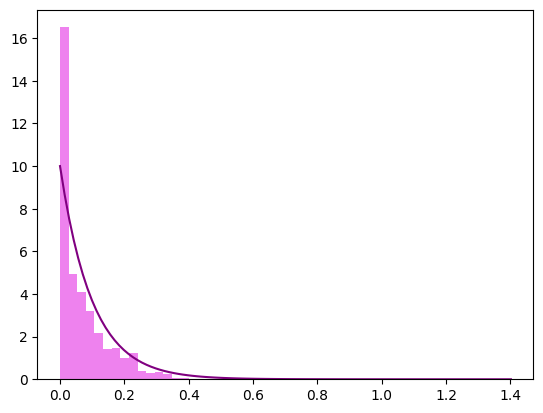

In [33]:
plt.hist(x, density=True, bins=15, color='#EE82EE')
xs = np.linspace(0, max(x)+1,100)
plt.plot(xs,j(xs,lam), color = '#800080') # Now h(x, lam) can handle the array input xs
plt.show()

In [34]:
np.mean(x)

0.064771182221525

In [35]:
#Analiticamente
media = 1/10
media

0.1

In [36]:
np.std(x)

0.07832423152525539

In [37]:
#Analiticamente
varianza = 1/10**2
varianza

0.01

In [38]:
np.sqrt(varianza)

0.1

Los valores, analiticos y simulados, son muy cercanos entre si.

Para la **media** tenemos

 -> Analiticamente: mu = 0.1

 -> Simulacion: mu = 0.06

Para la **desviación** estandar tenemos

 -> Analiticamente: mu = 0.1

 -> Simulacion: mu = 0.07
